In [22]:
import pandas as pd
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [23]:
file_path = r'C:\Users\moham\Documents\Machine learning dataset\spam.csv'
df = pd.read_csv(file_path)
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [24]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [25]:
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [26]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [27]:
ham=df.Category== 'ham'
ham.sum()

4825

In [28]:
spam=df.Category=='spam'
spam.sum() 

747

In [29]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [30]:
df['spam'].value_counts()

spam
0    4825
1     747
Name: count, dtype: int64

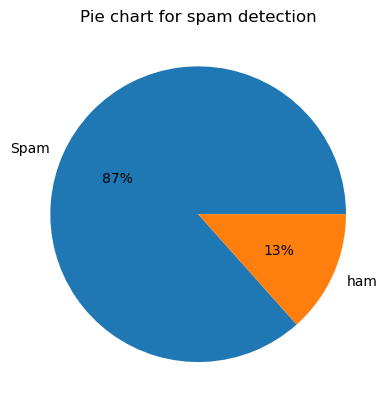

In [31]:
import matplotlib.pyplot as plt
plt.pie(x=df['spam'].value_counts(), labels=['Spam', 'ham'], autopct='%1.0f%%')
plt.title('Pie chart for spam detection')
plt.show()

In [32]:
count_1 = Counter(" ".join(df[df['Category']=='ham']["Message"]).split()).most_common(20)
df_1 = pd.DataFrame.from_dict(count_1)
df_1 = df_1.rename(columns={0: "words in non-spam", 1: "count"})
count_2 = Counter(" ".join(df[df['Category']=='spam'] ["Message"]).split()).most_common(20)
df_2 = pd.DataFrame.from_dict(count_2)
df_2 = df_2.rename(columns={0: "words in spam", 1: "count_"})

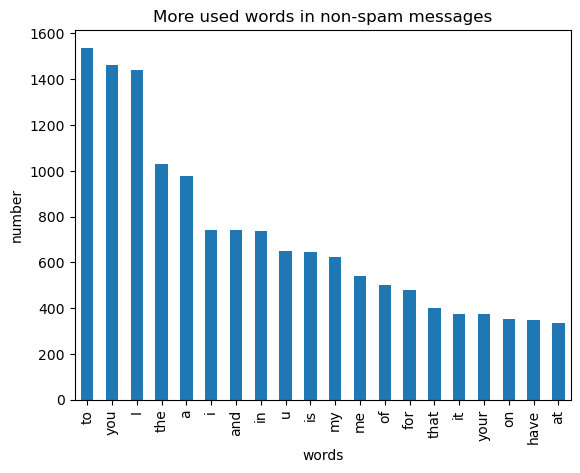

In [33]:
df_1.plot.bar(legend = False)
y_pos = np.arange(len(df_1["words in non-spam"]))
plt.xticks(y_pos, df_1["words in non-spam"])
plt.title('More used words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

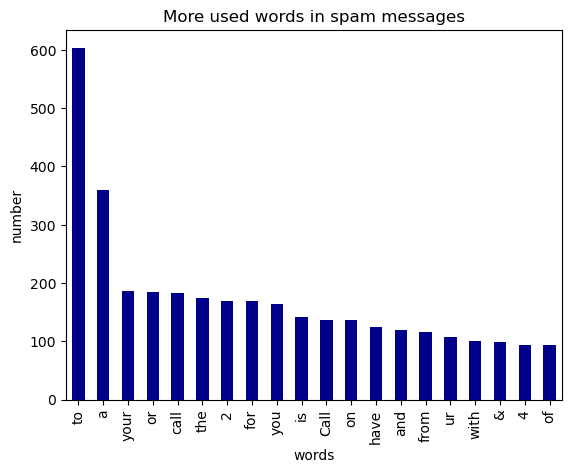

In [34]:
df_2.plot.bar(legend=False, color = 'darkblue')
y_pos= np.arange(len(df_2["words in spam"]))
plt.xticks(y_pos, df_2 ["words in spam"])
plt.title('More used words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [35]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [36]:
from wordcloud import WordCloud

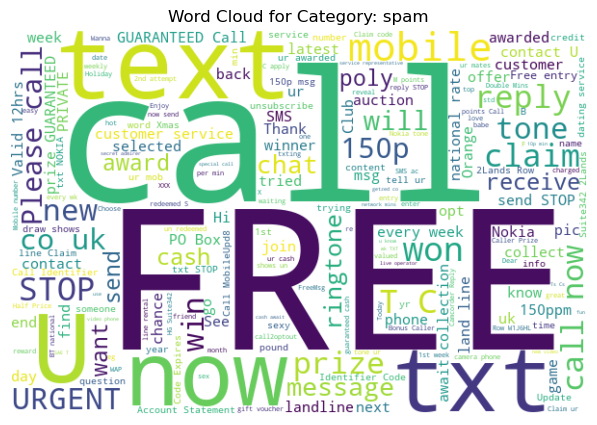

In [37]:
for category in df ['Category'].unique(): 
    filtered_df = df[df ['Category'] == category]
    text = ' '.join(filtered_df['Message'])

wordcloud = WordCloud (width=600, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for Category: {category}')
plt.axis('off')
plt.show()

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vector = TfidfVectorizer()
X = vector.fit_transform(df['Message'])
Y = df['spam']

In [39]:
dir(vector)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_t

In [40]:
vector.vocabulary_

{'go': 3567,
 'until': 8080,
 'jurong': 4370,
 'point': 5954,
 'crazy': 2334,
 'available': 1313,
 'only': 5567,
 'in': 4110,
 'bugis': 1763,
 'great': 3651,
 'world': 8544,
 'la': 4497,
 'buffet': 1761,
 'cine': 2057,
 'there': 7690,
 'got': 3611,
 'amore': 1079,
 'wat': 8320,
 'ok': 5534,
 'lar': 4533,
 'joking': 4338,
 'wif': 8446,
 'oni': 5563,
 'free': 3369,
 'entry': 2959,
 'wkly': 8502,
 'comp': 2174,
 'to': 7802,
 'win': 8459,
 'fa': 3096,
 'cup': 2394,
 'final': 3217,
 'tkts': 7789,
 '21st': 410,
 'may': 4955,
 '2005': 401,
 'text': 7640,
 '87121': 791,
 'receive': 6336,
 'question': 6228,
 'std': 7275,
 'txt': 7982,
 'rate': 6280,
 'apply': 1166,
 '08452810075over18': 77,
 'dun': 2811,
 'say': 6675,
 'so': 7070,
 'early': 2832,
 'hor': 3948,
 'already': 1051,
 'then': 7684,
 'nah': 5266,
 'don': 2720,
 'think': 7705,
 'he': 3801,
 'goes': 3575,
 'usf': 8126,
 'lives': 4688,
 'around': 1217,
 'here': 3852,
 'though': 7725,
 'freemsg': 3376,
 'hey': 3862,
 'darling': 2451,
 'it

In [41]:
from imblearn.over_sampling import SMOTE
sampling = SMOTE()
X_resampled, Y_resampled = sampling.fit_resample(X,Y)

In [42]:
X_resampled.shape

(9650, 8709)

In [43]:
Y_resampled.shape

(9650,)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,Y_resampled)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7237, 8709), (2413, 8709), (7237,), (2413,))

In [46]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=1)
model.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [75]:
y_pred = model.predict(X_test)

In [77]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_X',
 '_check_X_y',
 '_check_alpha',
 '_check_feature_names',
 '_check_n_features',
 '_count',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_counters',
 '_joint_log_likelihood',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_class_log_prior',
 '_

In [81]:
print(f"Model accuracy is: {model.score(X_test, y_test)}")

Model accuracy is: 0.9875673435557397


In [83]:
from sklearn.model_selection import cross_val_score

In [85]:
cross_val_score(MultinomialNB(alpha=10), X_train,y_train, cv=3)

array([0.96435972, 0.96558872, 0.96434494])

In [87]:
cross_val_score(MultinomialNB(alpha=5), X_train,y_train, cv=3)

array([0.97223373, 0.97719735, 0.97470978])

In [89]:
cross_val_score(MultinomialNB(alpha=3), X_train,y_train, cv=3)

array([0.97803564, 0.98134328, 0.97844113])

In [91]:
cross_val_score(MultinomialNB(alpha=1), X_train,y_train, cv=3)

array([0.98383755, 0.98797678, 0.98424544])

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1200x500 with 0 Axes>

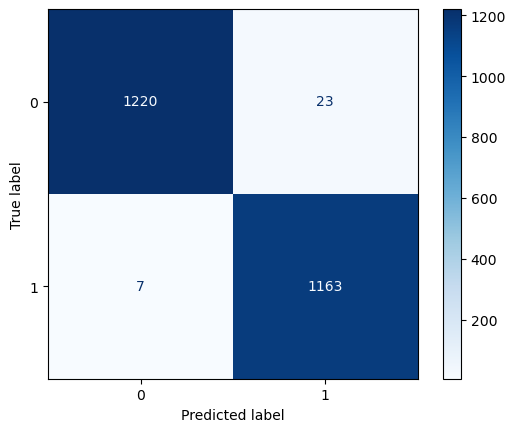

In [97]:
plt.figure(figsize=(12,5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [101]:
from sklearn.metrics import accuracy_score, classification_report

In [103]:
print(f"Accuracy in model: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy in model: 0.9875673435557397
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1243
           1       0.98      0.99      0.99      1170

    accuracy                           0.99      2413
   macro avg       0.99      0.99      0.99      2413
weighted avg       0.99      0.99      0.99      2413

